<a href="https://colab.research.google.com/github/ismaelnobrega/projeto/blob/master/ProjetoEstatisticaDescritivaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Disciplina - Estatística Descritiva**

Alunos: ***Thaiguara Linhares - Ismael Nóbrega da Silva - Túlio Pessoa de Azevedo Albuquerque***

O objetivo deste projeto é realizar um sumário estatístico sobre o conjunto de dados referentes às áreas queimadas nos incêndios florestais da região nordeste de Portugal. Esses dados foram extraídos de fontes meteorológicas dentre outras.

**Informações do dataset**


**X** - Coordenada espacial referente X dentro do mapa do Parque Montesinho: 1 até 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9


3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).




Link para o dataset: 

https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [0]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


**[Primeira Parte]**

## Análise Exploratória

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**Criando dataframe e selecionando o dataset**

In [4]:
df_fire = pd.read_csv(
    '/content/drive/My Drive/forestfires.csv')
print(df_fire.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


`Exibindo os primeiros n registros do dataset`

In [5]:
df_fire.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


**Hora de exibir as informações do nosso dataset**

In [6]:
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Descobrindo o tamanho do dataframe com o método shape**

In [7]:
df_fire.shape

(517, 13)

**Sumário das colunas do dataset**

In [8]:
df_fire.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

## <a id='sumario'> Sumário Estatístico de Descrição dos Dados</a>

In [9]:
df_fire.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Visualizando os tipos de dados com dtypes

***O tipo de dados das colunas 'month' e 'day' estão como objetos. Precisamos convertê-los para dados categóricos.***

In [10]:
df_fire.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

### **Rotinas de limpeza**
Nesse momento, os procedimentos de limpeza são iniciados para identificação de registros duplicados ou valores ausentes.

#### Hora de verificar se há dados ausentes no conjunto

In [0]:
df_ausentes = df_fire.isnull().sum()

In [12]:
print(df_ausentes)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


Existem dados duplicados? Com o método `duplicated()` podemos verificar.

In [13]:
df_fire.duplicated(keep=False).sum()

8

Com o método `drop_duplicates()` podemos eliminar as duplicatas

In [0]:
df_fire_limpo = df_fire.drop_duplicates()

Agora iremos verificar se ainda há valores duplicados. 

In [15]:
df_fire_limpo.duplicated(keep=False).sum()

0

Para o nosso projeto não há necessidade de verificação de unicidade nos registros. Nosso dataset possui poucos campos categóricos. Mas, iremos demonstrar os valores únicos do campo 'month'

In [16]:
df_fire_limpo['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

Nesse momento, iremos remover os valores `null` no dataset df_fire_limpo com o método `dropna()`

In [17]:
df_fire_limpo.dropna()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


**Categorização e Inserção de Nova Coluna**

In [18]:
df_fire_limpo['temp'].unique()

array([ 8.2, 18. , 14.6,  8.3, 11.4, 22.2, 24.1,  8. , 13.1, 22.8, 17.8,
       19.3, 17. , 21.3, 26.4, 22.9, 15.1, 16.7, 15.9,  9.3, 18.3, 19.1,
       21. , 19.5, 23.7, 16.3, 19. , 19.4, 30.2, 25.4, 11.2, 20.6, 17.7,
       21.2, 18.2, 21.7, 11.3, 14.1, 23.3, 18.4, 16.6, 19.6, 12.9, 25.9,
       14.7, 23. , 11.8, 11. , 20.8, 21.5, 20.4, 17.6, 27.7, 13.8, 13.9,
       12.3, 11.5,  5.5, 18.8, 23.1, 18.6, 17.2, 15.8, 15.6, 17.3, 27.6,
        6.7, 15.7, 21.6, 17.9, 20.2, 22.4, 25.3, 17.4, 23.4, 12.7, 11.6,
       19.8, 14.4, 20.1,  5.3, 21.4, 20.3, 13.7, 18.9, 15.5, 15.2, 10.6,
       10.3, 17.1, 22.5,  9. , 15.4, 14. , 14.9, 21.9, 23.8, 27.4, 13.2,
       24.2, 23.2, 24.8, 24.6, 29.6, 16.4, 28.6, 20.5, 16.1, 20.7, 14.2,
        5.8, 19.2, 23.9, 12.4, 16.8, 13.3, 11.7, 24.3, 23.5, 22.6,  8.8,
       22.1,  5.1, 16.9, 16.2, 13.4, 28.3, 27.8, 18.7, 25.1, 26.8, 25.7,
       28.7, 24. , 22.3, 21.8,  4.8,  4.6,  2.2,  4.2,  7.5, 12.6, 26.9,
       14.3, 16. , 24.9, 12.2, 19.7, 18.5, 18.1,  9

**Vamos criar uma função para definir as classes de temperatura**

In [0]:
def mapeia_temperatura(valor):
  if valor >= 0 and valor < 7:
    return 'MUITO FRIO'
  elif valor >= 7 and valor < 13:
    return 'FRESCA' 
  elif valor >= 13 and valor < 18:
      return 'AMENA'
  elif valor >= 18 and valor < 24:
        return 'AGRADAVEL'
  elif valor >= 24 and valor < 29:
          return 'MORNA'
  elif valor >= 29 and valor < 35:
            return 'QUENTE'
  elif valor > 35:
              return 'ESCALDANTE'
  else:
                return 'GÉLIDA'


Nesse ponto usaremos a função mapeia_temperatura para gerar as classes/faixas de temperaturas

In [0]:
df_fire_limpo['faixa_temperatura'] = df_fire_limpo.apply(lambda x: mapeia_temperatura(x['temp']), axis=1)

In [23]:
df_fire_limpo.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,faixa_temperatura
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,FRESCA
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,AGRADAVEL
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,AMENA
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,FRESCA
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,FRESCA


# Amostragem

**Definindo uma amostragem simples - com método "sem reposição"**

A amostra simples será definida como 30% 

In [27]:
df_fire_limpo.shape

(513, 14)

In [0]:
df_amostra_simples = df_fire_limpo.sample(frac=0.3)

In [25]:
df_amostra_simples.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,faixa_temperatura
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00,FRESCA
38,7,3,oct,sat,90.6,43.7,686.9,6.7,17.8,27,4.0,0.0,0.00,AMENA
472,8,3,jun,mon,88.2,96.2,229.0,4.7,14.3,79,4.0,0.0,1.94,AMENA
458,8,6,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,3.32,AGRADAVEL
434,1,4,aug,fri,90.6,269.8,811.2,5.5,22.2,45,3.6,0.0,0.00,AGRADAVEL


In [26]:
df_amostra_simples.shape

(154, 14)

**Amostragem simples - método com reposição**

In [28]:
df_fire_limpo.sample(frac=0.2, replace=True, random_state=1)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,faixa_temperatura
37,7,4,oct,fri,90.0,41.5,682.6,8.7,11.3,60,5.4,0.0,0.00,FRESCA
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,MORNA
73,5,4,aug,tue,88.8,147.3,614.5,9.0,17.3,43,4.5,0.0,0.00,AMENA
146,5,4,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95,AMENA
131,4,6,mar,mon,87.2,23.9,64.7,4.1,14.0,39,3.1,0.0,0.00,AMENA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00,AGRADAVEL
405,2,2,aug,tue,94.6,212.1,680.9,9.5,27.9,27,2.2,0.0,0.00,MORNA
172,7,4,aug,sun,91.4,142.4,601.4,10.6,20.1,39,5.4,0.0,2.74,AGRADAVEL
20,6,4,sep,tue,91.0,129.5,692.6,7.0,18.3,40,2.7,0.0,0.00,AGRADAVEL


In [29]:
df_fire_limpo.shape

(513, 14)

# Hora de analisar os dados com visualização

**Procedimentos de análise : com apenas uma variável (univariada)**

In [0]:
meses = df_fire_limpo['month'].value_counts(ascending=False)

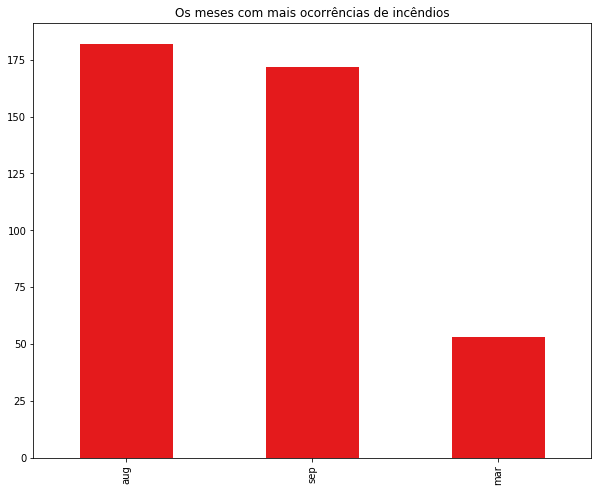

In [44]:
meses[:3].plot.bar(title='Os meses com mais ocorrências de incêndios',colormap='Set1', figsize=(10,8))

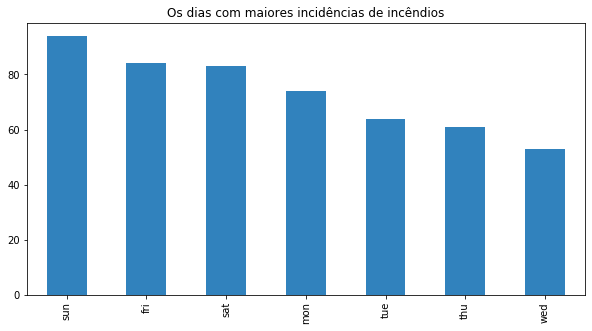

In [47]:
df_fire_limpo['day'].value_counts().plot.bar(title='Os dias com maiores incidências de incêndios', colormap='tab20c', figsize=(10,5))

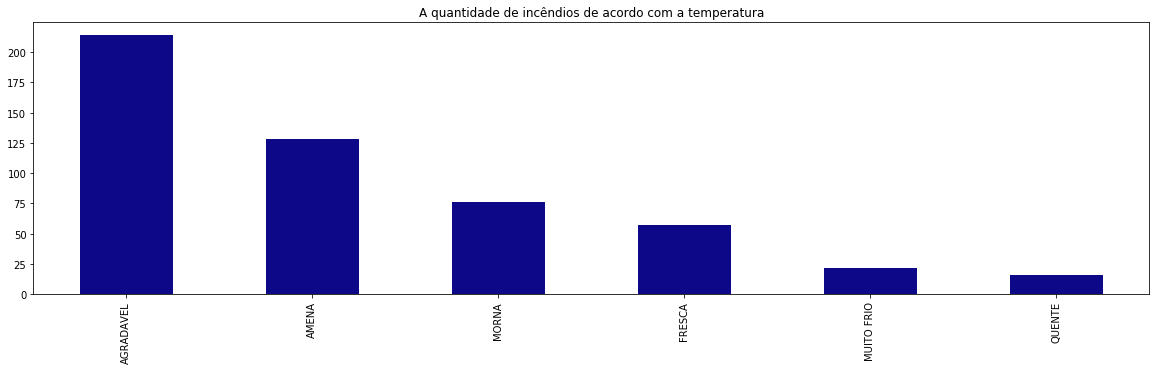

In [54]:
df_fire_limpo['faixa_temperatura'].value_counts().plot.bar(title='A quantidade de incêndios de acordo com a temperatura', colormap='plasma', figsize=(20,5))